# day 21

cart-classification and regression tree
entropy are categorical- 
entropy continuous and numerical- asm used gini index


entropy - measurement of randomness.
entropy higher; data more random

info gain - opposite to entropy (purity count)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('tour_package.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
df['Gender']= df['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)
df['MaritalStatus']= df['MaritalStatus'].apply(lambda x: 'Unmarried' if x == 'Single' else x)

In [8]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [9]:
cat_cols= ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

In [10]:
cc=['CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
for col in cc:
    print('-------')
    print(df[col].value_counts().sort_index())
    print(' ')

-------
1    3190
2     198
3    1500
Name: CityTier, dtype: int64
 
-------
1      39
2    1418
3    2402
4    1026
5       3
Name: NumberOfPersonVisiting, dtype: int64
 
-------
1.0     176
2.0     229
3.0    1466
4.0    2068
5.0     768
6.0     136
Name: NumberOfFollowups, dtype: int64
 
-------
3.0    2993
4.0     913
5.0     956
Name: PreferredPropertyStar, dtype: int64
 
-------
0    3466
1    1422
Name: Passport, dtype: int64
 
-------
1     942
2     586
3    1478
4     912
5     970
Name: PitchSatisfactionScore, dtype: int64
 
-------
0    1856
1    3032
Name: OwnCar, dtype: int64
 
-------
0.0    1082
1.0    2080
2.0    1335
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64
 


In [11]:
for col in cat_cols:
    print('-------')
    print(df[col].value_counts())
    print(' ')

-------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
 
-------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
 
-------
Male      2916
Female    1972
Name: Gender, dtype: int64
 
-------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
 
-------
Married      2340
Unmarried    1598
Divorced      950
Name: MaritalStatus, dtype: int64
 
-------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
 


In [12]:
sns.set_style('whitegrid')
sns.set_palette('Set1')

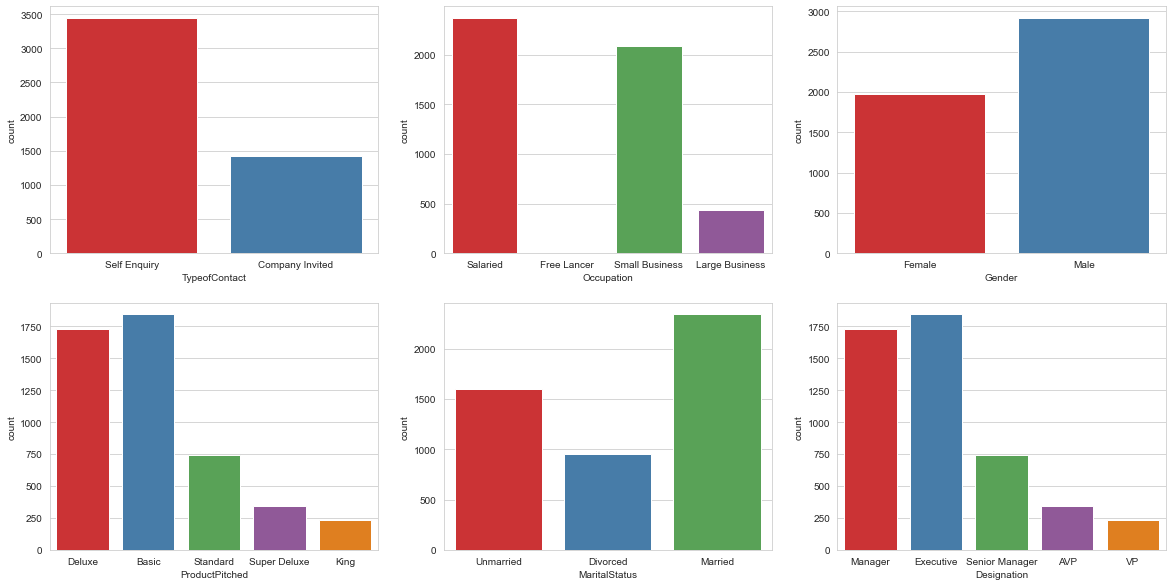

In [13]:
plt.figure(figsize=(20,10))
for index, col in enumerate(cat_cols):
    plt.subplot(2,3,index+1)
    sns.countplot(x=col,data=df)

In [14]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [15]:
num_cols= ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']

In [16]:
import warnings
warnings.filterwarnings('ignore')

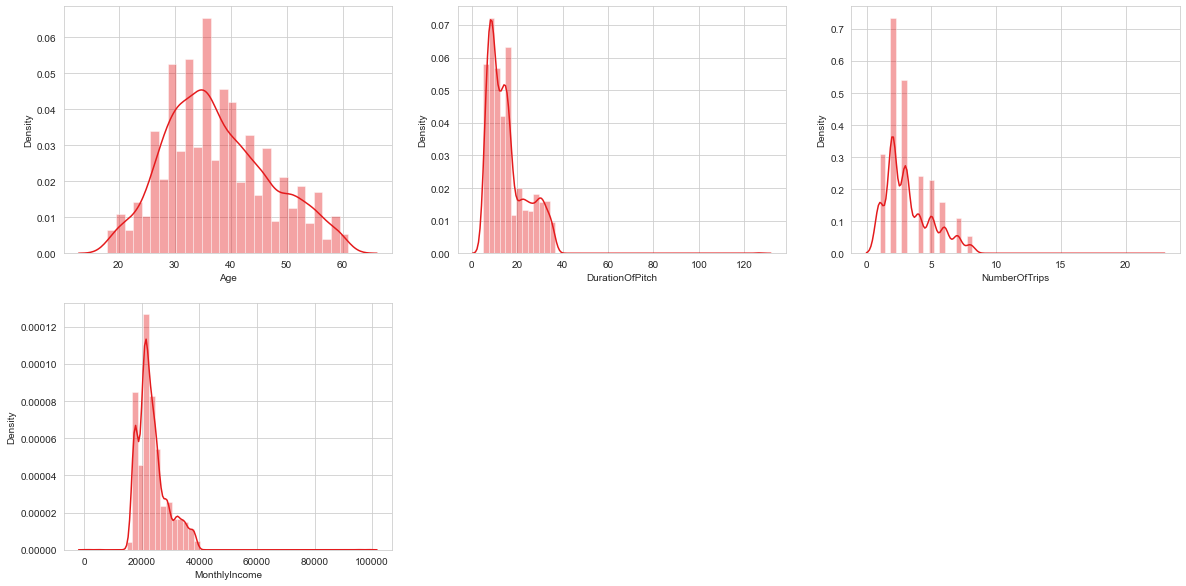

In [17]:
plt.figure(figsize=(20,10))
for index, col in enumerate(num_cols):
    plt.subplot(2,3,index+1)
    sns.distplot(df[col])

# above histogram univariate

# Bi-variate

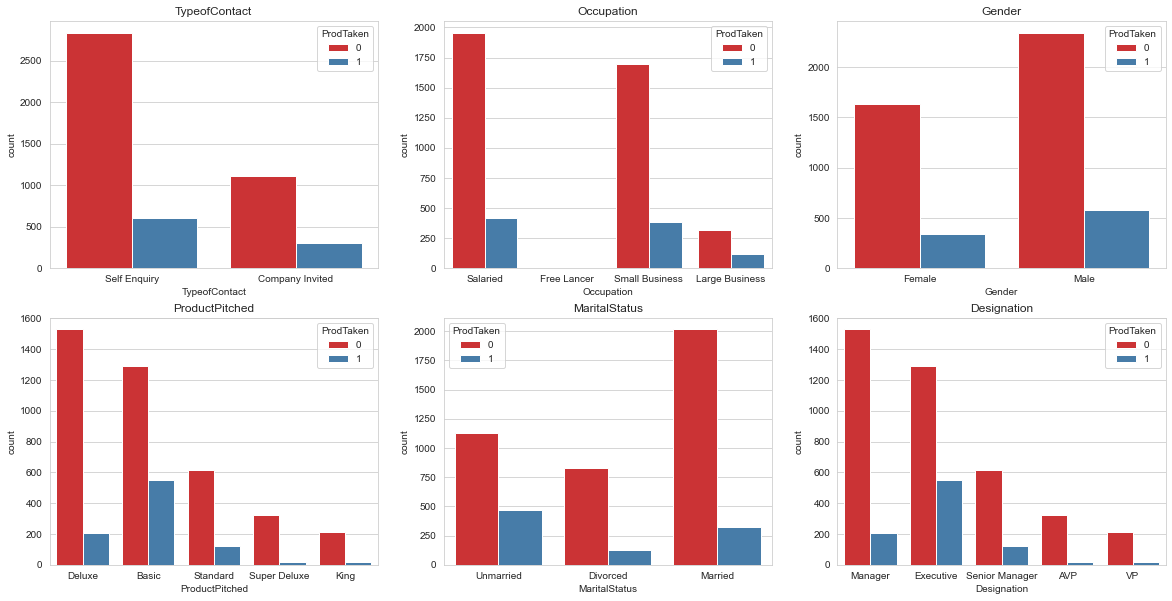

In [18]:
plt.figure(figsize=(20,10))
for index, col in enumerate(cat_cols):
    plt.subplot(2,3,index+1)
    plt.title(col)
    sns.countplot(x=col,data=df,hue='ProdTaken')
    

ValueError: num must be 1 <= num <= 6, not 7

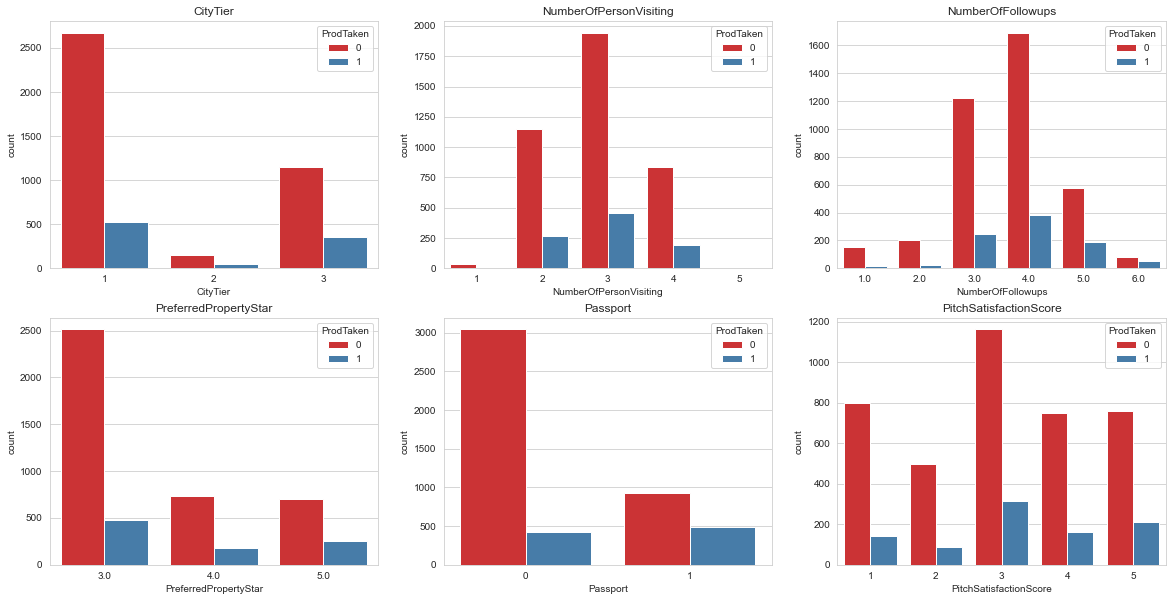

In [19]:
plt.figure(figsize=(20,10))
for index, col in enumerate(cc):
    plt.subplot(2,3,index+1)
    plt.title(col)
    sns.countplot(x=col,data=df,hue='ProdTaken')
    

In [ ]:
plt.figure(figsize=(40,20))
for index, col in enumerate(num_cols):
    sns.displot(data=df,x=col,hue='ProdTaken')
    plt.show()

In [ ]:
plt.figure(figsize=(20,10))
h= sns.heatmap(df.corr(),annot=True)

In [ ]:
f=plt.figure(figsize=(10,10))
h=sns.heatmap(pd.isnull(df),cbar=False)

In [ ]:
pd.isnull(df).sum()*100/len(df)

In [20]:
df= pd.get_dummies(df)

In [21]:
del df['CustomerID']

In [22]:
from sklearn.impute import KNNImputer

In [23]:
df1=pd.DataFrame(KNNImputer().fit_transform(df),columns=df.columns)

In [24]:
x = df1.drop('ProdTaken',axis=1)
y = df1['ProdTaken']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
imp=pd.Series(model_dt.feature_importances_,index=x.columns).sort_values(ascending=True)
plt.figure(figsize=(6,15))
imp.plot.barh()
plt.show()

NameError: name 'model_dt' is not defined

In [29]:
from sklearn.tree import plot_tree

In [30]:
plt.figure(figsize=(15,20))
f= plot_tree(model_dt,feature_names=x.columns,filled=True,fontsize=9,node_ids=True,class_names=True)
for i in f:
    arrow =i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('Black')
        arrow.set_linewidth(1)
        
plt.show()

NameError: name 'model_dt' is not defined

<Figure size 1080x1440 with 0 Axes>

In [31]:
model_dt= DecisionTreeClassifier().fit(xtrain,ytrain)

In [32]:
print('Training Score : ',100*model_dt.score(xtrain,ytrain))
print('Test Score : ',100*model_dt.score(xtest,ytest))

Training Score :  100.0
Test Score :  92.02453987730061


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model_rf = RandomForestClassifier().fit(xtrain,ytrain)

In [35]:
print('Training Score : ',100*model_rf.score(xtrain,ytrain))
print('Test Score : ',100*model_rf.score(xtest,ytest))

Training Score :  100.0
Test Score :  93.4560327198364


# Cross-Validation

In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
model_bag= BaggingClassifier().fit(xtrain,ytrain)

In [38]:
print('Training Score : ',100*model_bag.score(xtrain,ytrain))
print('Test Score : ',100*model_bag.score(xtest,ytest))

Training Score :  99.46291560102301
Test Score :  93.04703476482618


In [39]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost

In [40]:
model_ada= AdaBoostClassifier().fit(xtrain,ytrain)

In [41]:
print('Training Score : ',100*model_ada.score(xtrain,ytrain))
print('Test Score : ',100*model_ada.score(xtest,ytest))

Training Score :  84.68030690537084
Test Score :  85.78732106339469


In [42]:
!pip install xgboost

In [43]:
from xgboost import XGBClassifier

In [44]:
model_xg= XGBClassifier().fit(xtrain,ytrain)

[12:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
print('Training Score : ',100*model_xg.score(xtrain,ytrain))
print('Test Score : ',100*model_xg.score(xtest,ytest))

Training Score :  99.97442455242967
Test Score :  94.3762781186094


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
model_gb= GradientBoostingClassifier().fit(xtrain,ytrain)

In [48]:
print('Training Score : ',100*model_gb.score(xtrain,ytrain))
print('Test Score : ',100*model_gb.score(xtest,ytest))

Training Score :  88.69565217391305
Test Score :  86.70756646216769


# GRID SEARCH CV


In [49]:
from sklearn.model_selection import GridSearchCV, KFold

In [50]:
dt = DecisionTreeClassifier()

In [51]:
params_dt = {'criterion' : {"gini", "entropy"}, 'max_depth' : [10,20,30,None], 'min_samples_split' : [2,4,6,8,10]}

In [52]:
from datetime import datetime as dt

In [53]:
print(dt.now())
model_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params_dt,verbose=3).fit(xtrain,ytrain)
primt(dt.now())

2021-12-22 12:47:16.193865


ValueError: Parameter grid for parameter (criterion) needs to be a list or numpy array, but got (<class 'set'>). Single values need to be wrapped in a list with one element.

In [54]:
RandomForestClassifier()

RandomForestClassifier()

In [55]:
params_rf= {'n_estimators' : [20,40,60,80,100,150,200],
           'max_depth': [10,20,40,None],
           'min_samples_leaf': [5,10,15,20],
           'min_samples_split': [10,20,40,80,100],
           }

In [56]:
print(dt.now())
rf_grid = GridSearchCV(RandomForestClassifier(), cv= 10,param_grid=params_rf,verbose = 3,).fit(xtrain,ytrain)
print(dt.now())

2021-12-22 12:47:18.661910
Fitting 10 folds for each of 560 candidates, totalling 5600 fits
[CV 1/10] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20;, score=0.849 total time=   0.0s
[CV 2/10] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20;, score=0.844 total time=   0.0s
[CV 3/10] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20;, score=0.867 total time=   0.0s
[CV 4/10] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20;, score=0.839 total time=   0.0s
[CV 5/10] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20;, score=0.880 total time=   0.0s
[CV 6/10] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20;, score=0.857 total time=   0.0s
[CV 7/10] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20;, score=0.844 total time=   0.0s
[CV 8/10] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_est

## support vector machine

In [57]:
!pip install bs4


In [58]:
import requests

In [59]:
from bs4 import BeautifulSoup

In [60]:
url = 'https://www.google.com/search?q=python'

In [61]:
r = requests.get(url)
print(r.status_code)


200


<!doctype html><html lang="en-IN"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>python - Google Search</title><script nonce="Xgcx6x2gmXAvD2st0WJHzg==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{}
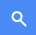
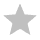
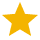
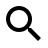
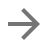
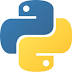
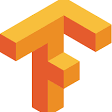
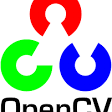
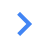
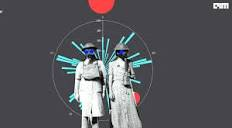
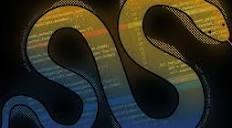
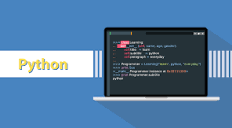
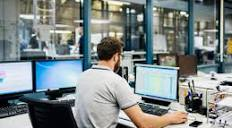
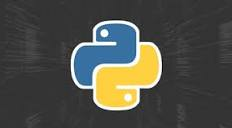

In [62]:
print(r.text)

In [63]:
s = 'BNeawe UPmit AP7Wnd'

In [64]:
soup = BeautifulSoup(r.text,'html.parser')

In [65]:
h3 = soup.find_all('div', {'class':s})

In [66]:
h3[0].text

'www.python.org'

In [67]:
url = [i.text for i in soup.find_all('div',{'class':s})]
url

['www.python.org',
 'en.wikipedia.org › wiki › Python_(programming_language)',
 'www.w3schools.com › python',
 'www.tutorialspoint.com › python',
 'www.programiz.com › python-programming › online-compiler',
 'www.codecademy.com › catalog › language › python']